In [ ]:
!nvidia-smi

Fri May 30 01:58:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='warehouse/data.yaml' epochs=25 imgsz=416 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/warehouse-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/val/confusion_matrix.png', width=600)

/content


TypeError: 'module' object is not callable

/content


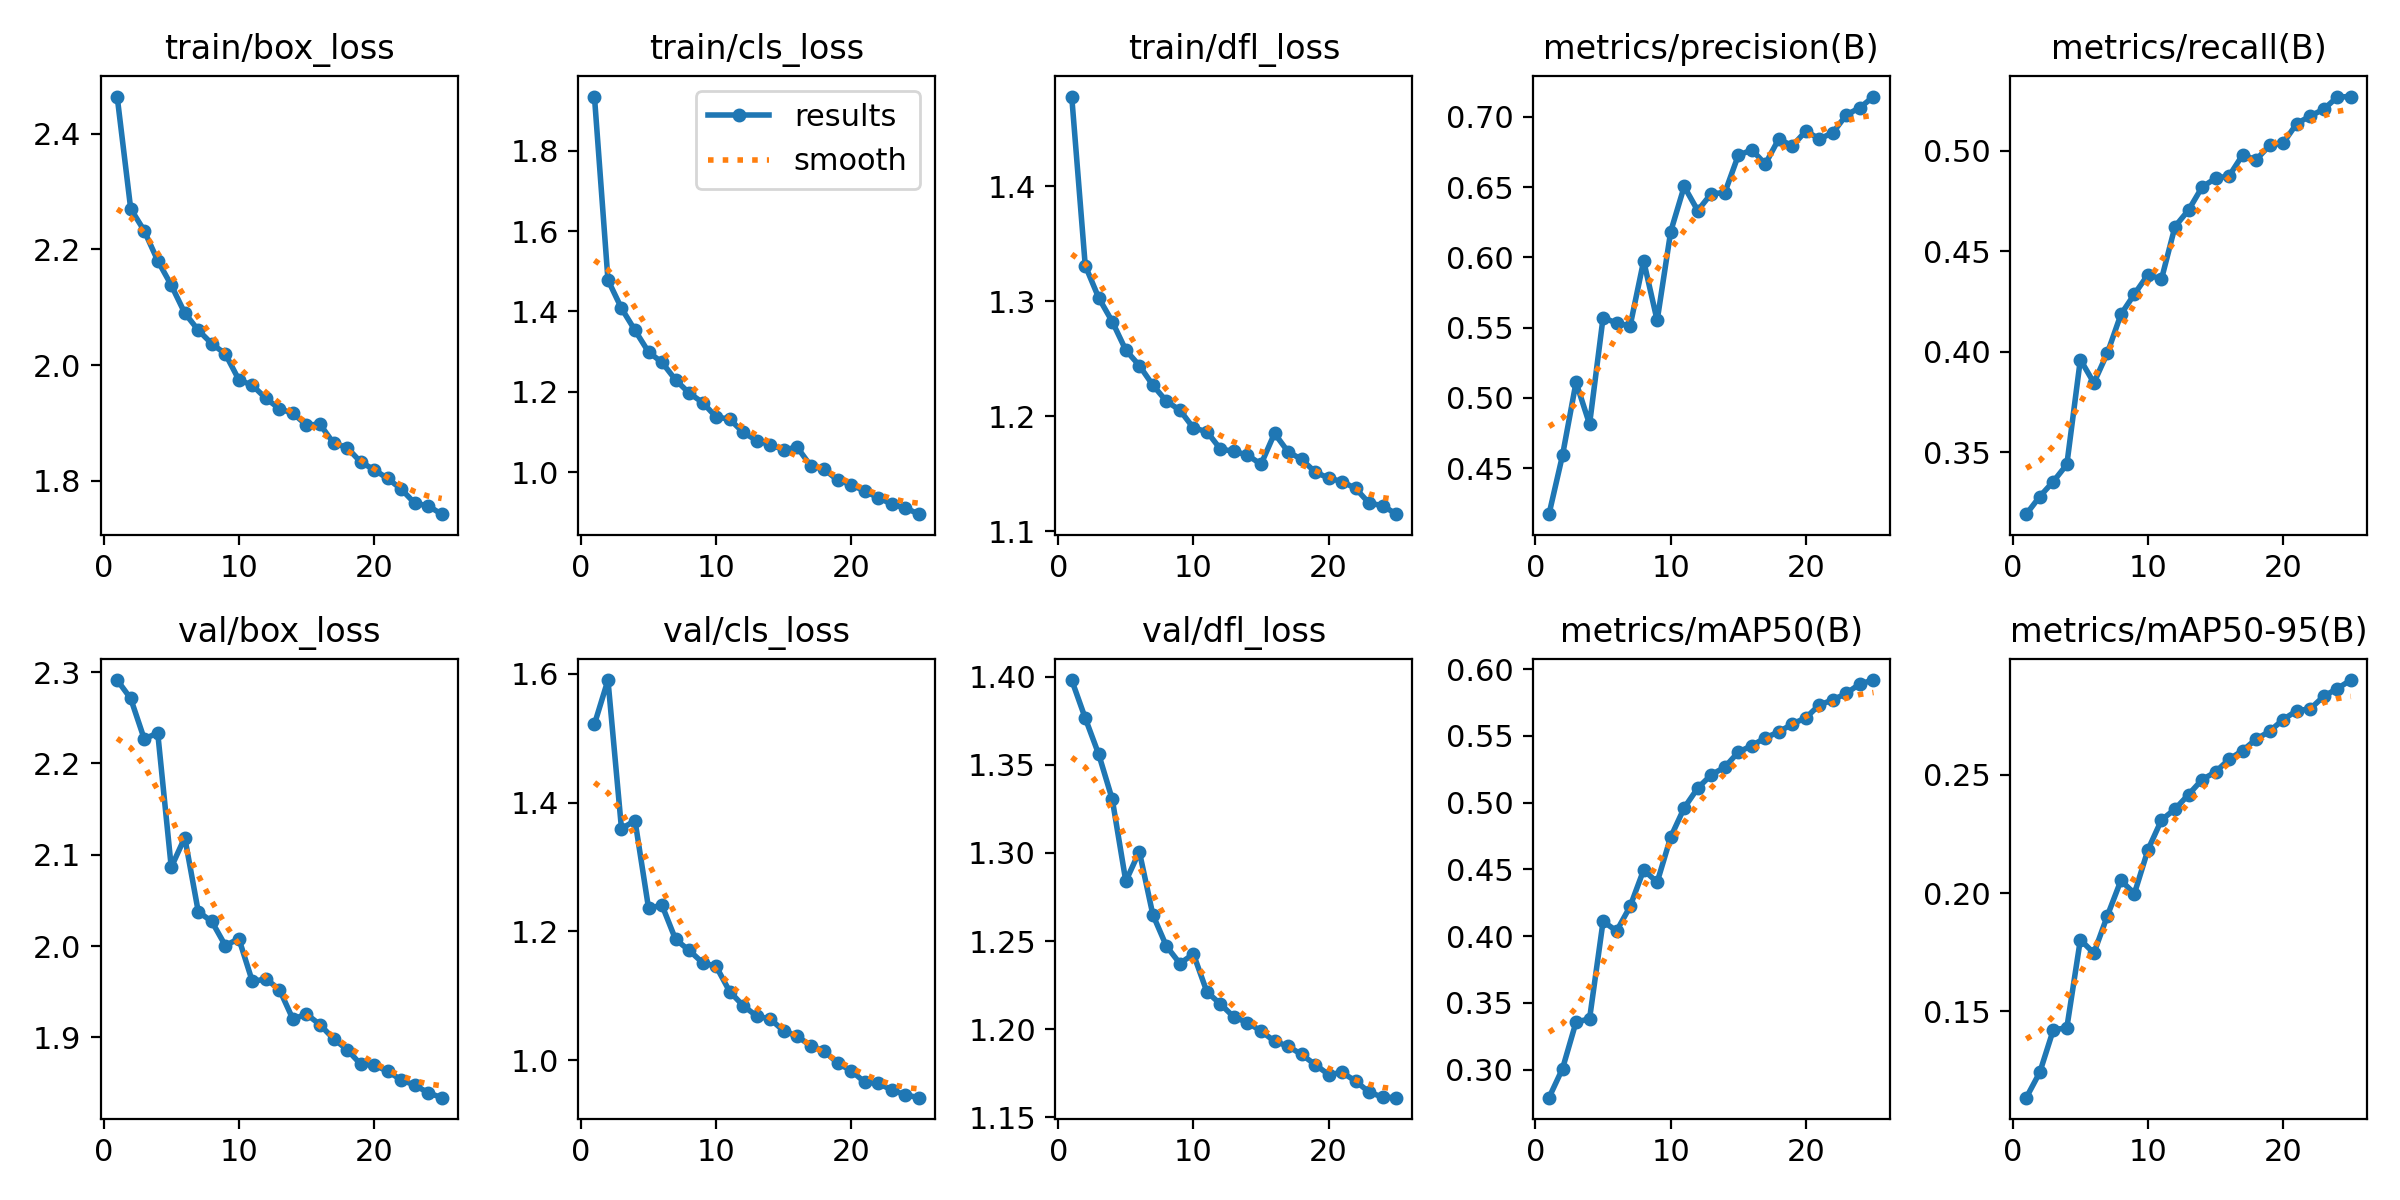

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


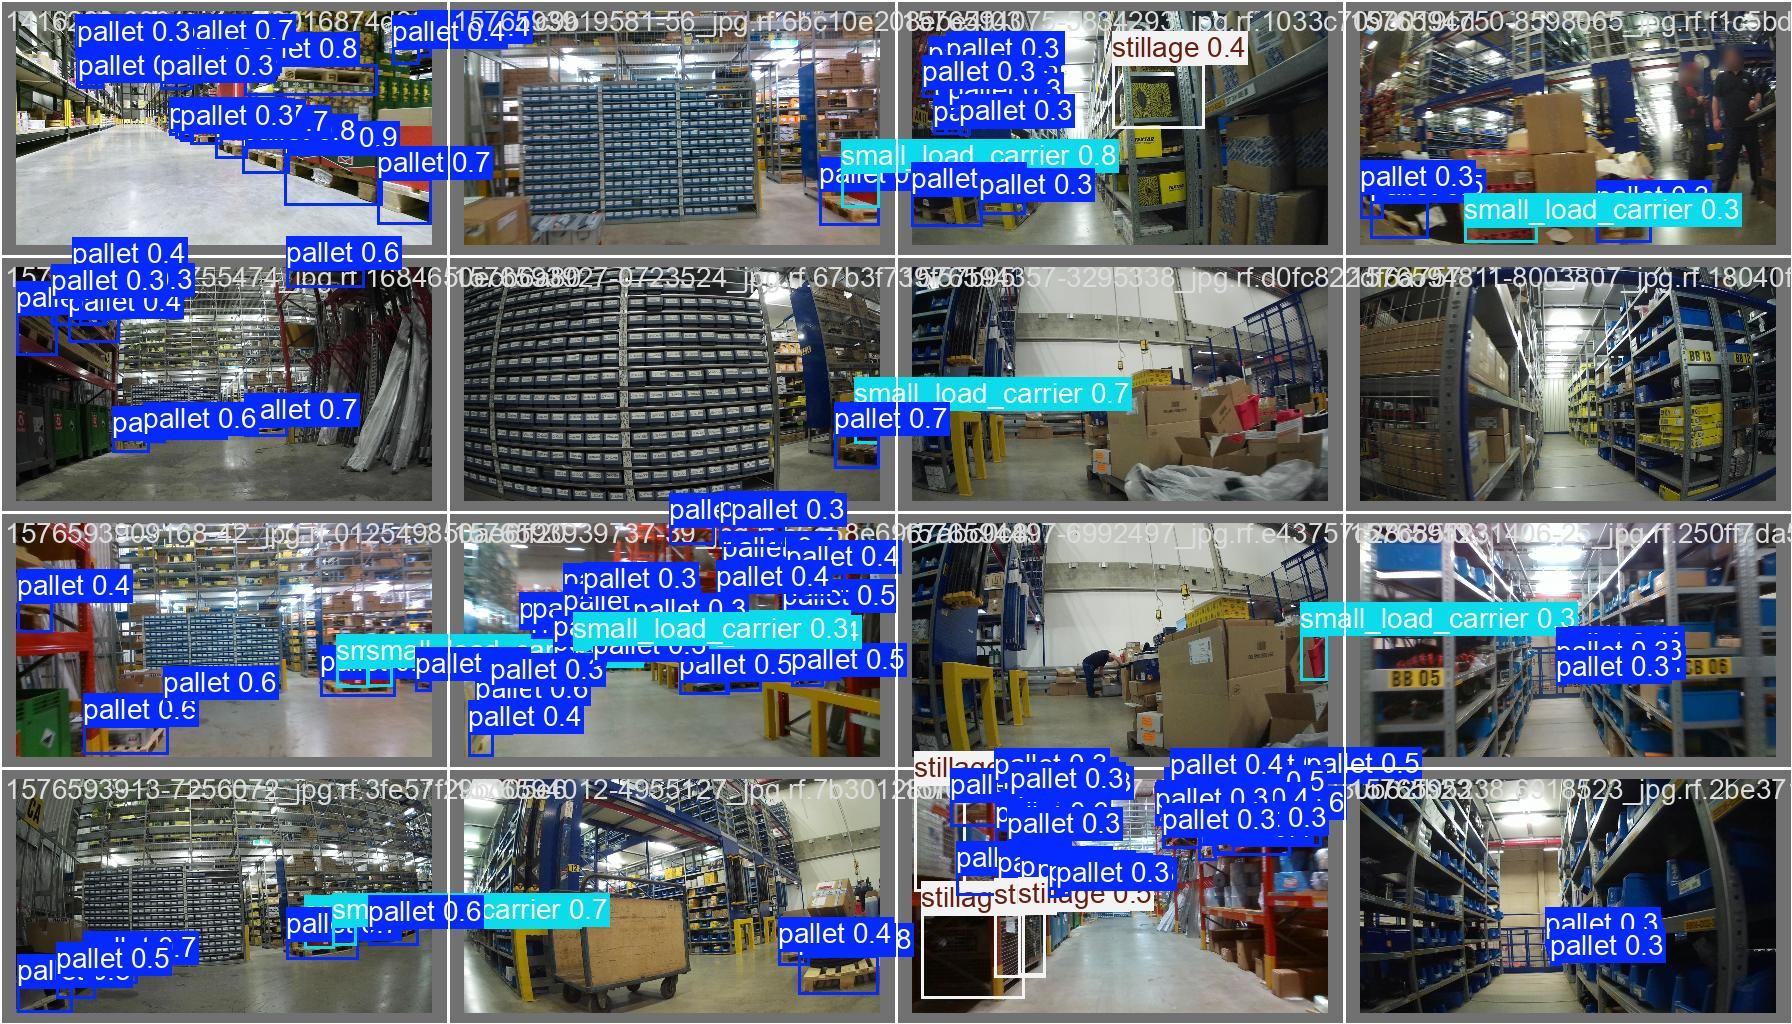

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml plots=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/warehouse-1/valid/labels.cache... 1057 images, 12 backgrounds, 0 corrupt: 100% 1057/1057 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 67/67 [00:18<00:00,  3.60it/s]
                   all       1057      34700      0.718      0.527      0.593       0.29
                pallet       1018      29230      0.687      0.551      0.597       0.26
    small_load_carrier        248       3954      0.713      0.462      0.533      0.244
              stillage        304       1516      0.754      0.567      0.649      0.367
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/249 /content/warehouse-1/test/images/1041302-2676_jpg.rf.ced4312ced89e0e3da67c44c09d4344a.jpg: 256x416 2 pallets, 37 small_load_carriers, 50.1ms
image 2/249 /content/warehouse-1/test/images/1564562440425-94_jpg.rf.b5a12ffef767fb6fecf9e210188c5a1a.jpg: 256x416 4 pallets, 8.2ms
image 3/249 /content/warehouse-1/test/images/1564562546-8779054_jpg.rf.baadb6dd79a5bd1267e8464c7ae57912.jpg: 320x416 2 stillages, 39.7ms
image 4/249 /content/warehouse-1/test/images/1564562613-255014_jpg.rf.bfc6a93eef2a8d09182a2741a7535b85.jpg: 320x416 42 pallets, 3 stillages, 8.4ms
image 5/249 /content/warehouse-1/test/images/1564562629-5272853_jpg.rf.3026c3352f47c4e492de6a0cb60bc819.jpg: 320x416 7 pallets, 1 stillage, 8.3ms
image 6/249 /content/warehouse-1/test/images/1564562643-7552536_jpg.rf.b77f75af8482bb3585f8d1ee4c3d126b.


image 1/1 /content/warehouse-1/train/images/1007336-5853_jpg.rf.6c32f94cb7ce82bb9a97d3120eca3d80.jpg: 256x416 29 pallets, 10 small_load_carriers, 8.8ms
Speed: 2.1ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)


To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Saved visualization to annotated_image.png


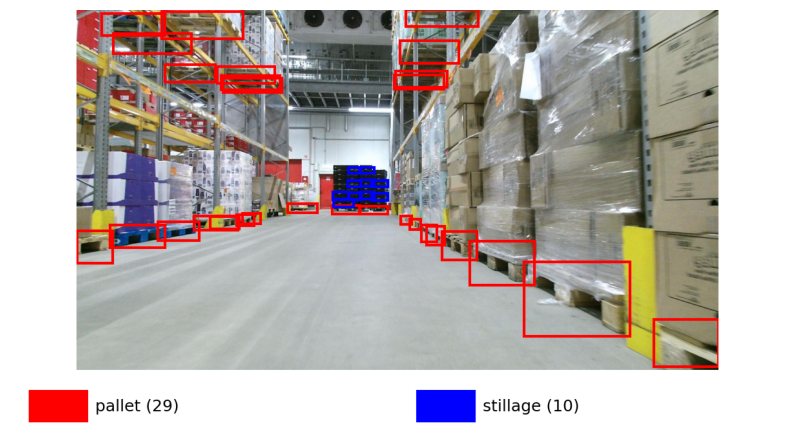

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision.transforms.functional import to_pil_image
from ultralytics import YOLO
from PIL import Image
from collections import Counter
import numpy as np

# Class name and color mappings
class_id_to_name = {
    0: 'pallet',
    1: 'stillage',
    3: 'small_load_carrier'
}

category_colors = {
    0: 'red',
    1: 'blue',
    3: 'orange'
}

# Load model and image
model_path = '/content/runs/detect/train2/weights/best.pt'
source_path = '/content/warehouse-1/train/images/1007336-5853_jpg.rf.6c32f94cb7ce82bb9a97d3120eca3d80.jpg'
model = YOLO(model_path)
results = model.predict(source=source_path, conf=0.23, save=False)
result = results[0]
img = Image.open(source_path).convert("RGB")

boxes = torch.tensor(result.boxes.xyxy)
labels = torch.tensor(result.boxes.cls).int()
label_counts = Counter(labels.tolist())

def get_random_color():
    return tuple(np.random.rand(3))

for label in label_counts:
    if label not in category_colors:
        category_colors[label] = get_random_color()
    if label not in class_id_to_name:
        class_id_to_name[label] = f'class {label}'

targets = {'boxes': boxes, 'labels': labels}

def show_image_with_boxes(img, targets, ax, category_colors):
    if isinstance(img, torch.Tensor):
        img = to_pil_image(img)
    ax.imshow(img)
    ax.axis('off')
    boxes = targets['boxes'].cpu().numpy()
    labels = targets['labels'].cpu().numpy()
    for bbox, label in zip(boxes, labels):
        w = bbox[2] - bbox[0]
        h = bbox[3] - bbox[1]
        color = category_colors.get(label, 'gray')
        rect = patches.Rectangle((bbox[0], bbox[1]), w, h,
                                 linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)

# Figure size, tuned for ~416x146 image scale (can adjust)
fig_width, fig_height = 8, 4.5
fig = plt.figure(figsize=(fig_width, fig_height))
gs = fig.add_gridspec(2, 1, height_ratios=[7, 1], hspace=0.05)

ax1 = fig.add_subplot(gs[0])
show_image_with_boxes(img, targets, ax1, category_colors)

ax2 = fig.add_subplot(gs[1])
ax2.axis('off')

num_classes = len(label_counts)
spacing = 1.0 / max(num_classes, 1)

for i, (label, count) in enumerate(label_counts.items()):
    color = category_colors[label]
    class_name = class_id_to_name[label]
    label_text = f"{class_name} ({count})"

    rect_x = i * spacing + spacing * 0.05
    rect_width = spacing * 0.15
    rect_height = 0.6

    ax2.add_patch(patches.Rectangle(
        (rect_x, 0.2), rect_width, rect_height, transform=ax2.transAxes, color=color))
    ax2.text(
        rect_x + rect_width + 0.01, 0.5, label_text,
        transform=ax2.transAxes, va='center', fontsize=12)

# Remove horizontal margins/padding by adjusting subplots params
plt.subplots_adjust(left=0, right=1, top=0.97, bottom=0, hspace=0.05)

# Save the figure as PNG with tight bounding box and no padding
output_path = 'annotated_image.png'
fig.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=150)

plt.close(fig)
print(f"Saved visualization to {output_path}")

from PIL import Image
import matplotlib.pyplot as plt

# Load the saved image
img_path = 'annotated_image.png'
img = Image.open(img_path)

# Display it with matplotlib
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.show()

